In [107]:
import numpy as np
import tensorflow as tf
import pylab as plt
import cmocean
from scipy.spatial import cKDTree

In [108]:
def generate_data_aliased(noise=0.,sample=100):
    """Generate Gaussian bump in phase.
    noise : float
        amount of gaussian noise to add as fraction of peak height
    sample : int
        number to sample
    """
    #max gradient at b
    a = 50
    b = 1
    max_slope = np.abs(a/np.sqrt(np.exp(1))/b)
    
    #in dx want max_slope*dx > np.pi
    dx = 1.5*np.pi/max_slope
    
    N = 20
    xvec = np.linspace(-dx*N, dx*N, N*2 + 1)
    X,Y = np.meshgrid(xvec,xvec,indexing='ij')
    phi = a * np.exp(-(X**2 + Y**2)/2./b**2)
    X = np.array([X.flatten(),Y.flatten()]).T
    
    phi += a*noise*np.random.normal(size=phi.shape)
    phi = phi.flatten()
    if sample != 0:
        mask = np.random.choice(phi.size,size=sample,replace=False)
        return X[mask,:],phi[mask]
    return X,phi

def generate_data_nonaliased(noise=0.,sample=100):
    """Generate Gaussian bump in phase.
    noise : float
        amount of gaussian noise to add as fraction of peak height
    sample : int
        number to sample
    """
    #max gradient at b
    a = 15
    b = 1
    max_slope = np.abs(a/np.sqrt(np.exp(1))/b)
    
    #in dx want max_slope*dx < np.pi
    dx = 0.5*np.pi/max_slope
    
    N = 20
    xvec = np.linspace(-dx*N, dx*N, N*2 + 1)
    X,Y = np.meshgrid(xvec,xvec,indexing='ij')
    phi = a * np.exp(-(X**2 + Y**2)/2./b**2)
    X = np.array([X.flatten(),Y.flatten()]).T
    
    phi += a*noise*np.random.normal(size=phi.shape)
    phi = phi.flatten()
    if sample != 0:
        mask = np.random.choice(phi.size,size=sample,replace=False)
        return X[mask,:],phi[mask]
    return X,phi

def plot_phase(X,phi):
    """Plot the phase.
    X : array (num_points, 2)
        The coords
    phi : array (num_points,)
        The phases
    """
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:,0],X[:,1],phi,c=np.angle(np.exp(1j*phi)),cmap=cmocean.cm.phase,s=10,vmin=-np.pi,vmax=np.pi)
    plt.colorbar(sc)
    plt.show()
    
    

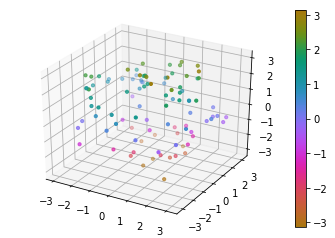

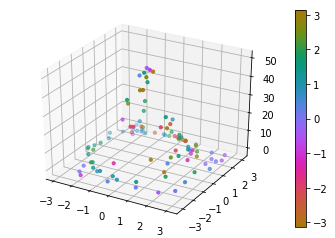

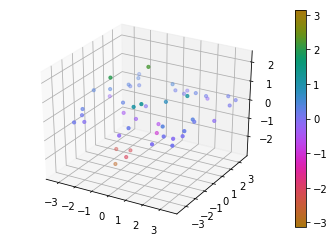

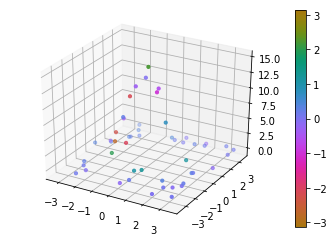

In [109]:
X,phi = generate_data_aliased(0.01)
plot_phase(X,np.angle(np.exp(1j*phi)))
plot_phase(X,phi)

X,phi = generate_data_nonaliased(0.01,sample=50)
plot_phase(X,np.angle(np.exp(1j*phi)))
plot_phase(X,phi)

[[ 0 14 20]
 [ 0 20 27]
 [ 0 33 49]
 [ 0 34 46]
 [ 1  4 32]
 [ 1 26 28]
 [ 2 12 21]
 [ 2 12 23]
 [ 2 12 27]
 [ 3  6 18]
 [ 3  6 47]
 [ 5 28 32]
 [ 5 31 32]
 [ 6 18 47]
 [ 7  9 34]
 [ 7  9 46]
 [ 7 34 46]
 [ 8 10 30]
 [ 8 30 48]
 [10 30 41]
 [10 41 43]
 [10 42 43]
 [11 36 40]
 [12 21 44]
 [12 22 23]
 [13 18 36]
 [13 32 40]
 [13 36 40]
 [14 20 33]
 [15 17 19]
 [15 17 39]
 [15 19 39]
 [16 21 29]
 [18 36 47]
 [20 27 33]
 [20 33 38]
 [20 38 49]
 [21 29 44]
 [24 26 29]
 [24 28 31]
 [24 31 32]
 [25 30 48]
 [25 35 45]
 [25 35 48]
 [26 29 44]
 [26 31 37]
 [28 31 32]
 [41 42 43]]
[ 0  1 34 28 35  2 36  8  3  6 16 14  7 24 15 23 32 37 44  5 45 38  4 39 46
 40 12 11 30 29 42 43 31 41 19 17 18 21 20 47 26 22 25 27 33 13  9 10]
[[ 0 14 20]
 [ 0 20 27]
 [ 0 33 49]
 [ 0 34 46]
 [ 1  4 32]
 [ 1 26 28]
 [ 2 12 21]
 [ 2 12 23]
 [ 2 12 27]
 [ 3  6 18]
 [ 3  6 47]
 [ 5 28 32]
 [ 5 31 32]
 [ 6 18 47]
 [ 7  9 34]
 [ 7  9 46]
 [ 7 34 46]
 [ 8 10 30]
 [ 8 30 48]
 [10 30 41]
 [10 41 43]
 [10 42 43]
 [11 36 40]


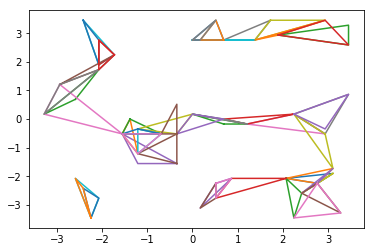

In [111]:


# kt = cKDTree(X)
# dist,idx = kt.query(X,k=2)
# j_idx = idx[:,1]
# Y = X[j_idx,:]
# M1 = (X+Y)/2.
# dist,idx = kt.query(M1,k=3)
# k_idx = idx[:,2]
# Z = X[k_idx,:]
# for i,j,k in zip(range(X.shape[0]), j_idx, k_idx):
#     #print(i,j,k)
#     plt.plot([X[i,0],X[j,0],X[k,0],X[i,0]],[X[i,1],X[j,1],X[k,1],X[i,1]])
# plt.show()


kt = cKDTree(X)

dist,idx = kt.query(X,k=4)
triplets = np.sort(idx[:,[0,2,3]],axis=1)
ra = np.ravel_multi_index((triplets[:,0],triplets[:,1],triplets[:,2]),[X.shape[0]]*3)
unique_triplets = np.unique(ra)
triplets = np.stack(np.unravel_index(unique_triplets,[X.shape[0]]*3),axis=1)
print(triplets)
    
M = (X[triplets[:,0],:] + X[triplets[:,1],:] + X[triplets[:,2],:])/3.
kt = cKDTree(M)
_,idx = kt.query(M[0,:],k = M.shape[0])
print(idx)

# trips_ = []
# for n in range(len(idx)-1):
#     trips_.append((triplets[idx[n],0],triplets[idx[n],1], triplets[idx[n+1],2]))
# triplets = np.concatenate([triplets,trips_],axis=0)
# triplets = np.unique(triplets,axis=0)
print(triplets)
for i,j,k in triplets:
    plt.plot([X[i,0],X[j,0],X[k,0],X[i,0]],[X[i,1],X[j,1],X[k,1],X[i,1]])
#plt.plot(M[idx,0],M[idx,1],c='red')
plt.show()



In [ ]:

g = tf.Graph()
sess = tf.InteractiveSession(graph=g)
with g.as_default():
    with tf.name_scope("unwrapper") as scope:
        g = tf.placeholder(tf.float64,shape=(None,),name='g')
        K = tf.get_variable("K",shape=(None,5),dtype=tf.float64,initializer=tf.zeros_initializer)
        K_softmax = tf.softmax(K,axis=1)
        indices = tf.constant(np.stack([-2,-1,0,1,2]*X.shape[0],axis=0))
        f = g + tf.reduce_sum(K_softmax*indices,axis=1)*2*np.pi
        f[triplets[:,1]] - f[triplets[:,0]] + f[triplets[:,2]] - f[triplets[:,1]] + f[triplets[:,0]] - f[triplets[:,2]]
        
    